# **Topic 4: Clustering Analysis with Hierachical Method**
---

## **Lecture note**
---

## **Python Codes**
---

In [ ]:
# Import the data
import pandas as pd
# Graph plotting
import matplotlib.pyplot as plt
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://drive.google.com/file/d/1dZ8XHOjN-AOQ3GvqQVUa2jkGEiPAY4oC/view?usp=sharing'
data_path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
Forbes = pd.read_csv(data_path)
Forbes.index += 1
Forbes.head()

,TYPE,SYMBOL,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,Chem,dia,1,13.0,0.7,20.2,15.5,7.2,9,0.426398
2,Chem,dow,2,13.0,0.7,17.2,12.7,7.3,8,0.380693
3,Chem,stf,3,13.0,0.4,14.5,15.1,7.9,8,0.406780
4,Chem,dd,4,12.2,0.2,12.9,11.1,5.4,9,0.568182
5,Chem,uk,5,10.0,0.4,13.6,8.0,6.7,5,0.324544


### **Standardizing the variables**
---

In [ ]:
# standardization of the continuous variables
X = Forbes.iloc[:, 3:].values
# import the function StandardScaler
from sklearn.preprocessing import StandardScaler
# fit_transform means to fit the model by the data and then transform 
# the data by the fitted model
X_scaled = StandardScaler().fit_transform(X) 
# make is as the dataframe
X_d = pd.DataFrame(X_scaled, columns=['ROR5', 'DE', 'SALESGR5', 'EPS5', 'NPM1', 'PE', 'PAYOUTR1'], index= range(1, 26))

In [ ]:
X_d.head()

,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,0.982788,-0.007511,0.437915,0.283215,1.315877,-0.242222,0.153676
2,0.982788,-0.007511,0.051519,-0.058008,1.361314,-0.451035,-0.221020
3,0.982788,-0.570864,-0.296236,0.234469,1.633941,-0.451035,-0.007155
4,0.674221,-0.946433,-0.502314,-0.252993,0.497997,-0.242222,1.316042
5,-0.174341,-0.570864,-0.412155,-0.630776,1.088688,-1.077472,-0.681338


### **Hierarchical clustering**
---

In [ ]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

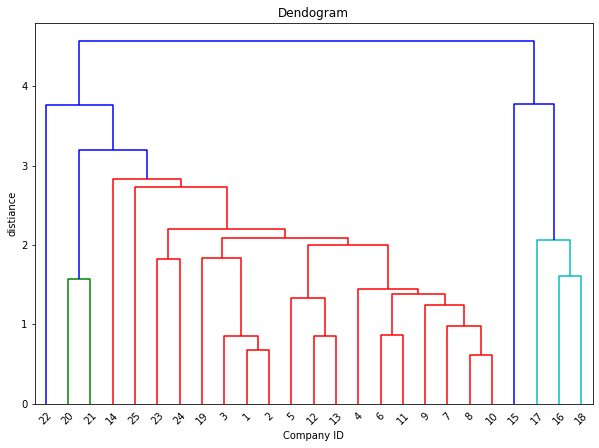

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendogram") 
Z = linkage(X_scaled, method='centroid', metric='euclidean')
dendrogram(Z, labels = range(1, len(X_scaled) + 1))
plt.xlabel('Company ID')
plt.ylabel('distiance')
plt.show()

In sklearn, AgglomerativeClustering does not provide centroid linkage. We will try to use complete linkage instead.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'distiance')

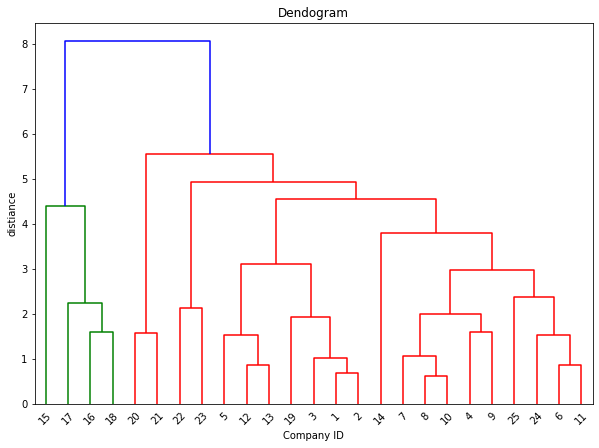

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendogram") 
Z = linkage(X_scaled, method='complete', metric='euclidean')
dendrogram(Z, labels = range(1, len(X_scaled) + 1))
plt.xlabel('Company ID')
plt.ylabel('distiance')

In [ ]:
# We choose 2 clusters
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = 'euclidean').fit(X_d)
hier_labels = cluster.labels_

In [ ]:
Forbes['hierarchical_label'] = hier_labels
print(hier_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]


#### **Analysis of the results**
---

- In AgglomerativeClustering, linkage corresponds to method and affinity corresponds to metric in linkage function provided by scipy.

- The result is different from that using centroid linkage. It is because the distance between clusters is different for different linkage. Therefore, the model merges different clusters together when using different linkage.

- However, the variation of the results is not too large. Most of the previous interpretation is coherent with the dendrogram when using complete linkage.

#### **Comparison with K-means**
---

In [ ]:
from sklearn.cluster import KMeans

Let us pick $K=3$ and run the $K$-means algorithm.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.predict(X_scaled)

In [ ]:
print(kmeans_labels)

[1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 2 2 2 2]


In [ ]:
Forbes['kmeans_label'] = kmeans_labels
Forbes['hierarchical_label'] = hier_labels
Forbes[['TYPE', 'kmeans_label', 'hierarchical_label']]

,TYPE,kmeans_label,hierarchical_label
1,Chem,1,0
2,Chem,1,0
3,Chem,1,0
4,Chem,1,0
5,Chem,2,0
6,Chem,2,0
7,Chem,2,0
8,Chem,2,0
9,Chem,2,0
10,Chem,2,0


In [ ]:
Forbes.groupby('hierarchical_label').mean()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1,kmeans_label
hierarchical_label,,,,,,,,,
0,12.333333,10.752381,0.557143,13.885714,10.714286,4.009524,8.238095,0.430133,1.666667
1,16.500000,8.875000,1.475000,32.100000,26.100000,5.850000,20.250000,0.289629,0.000000


In [ ]:
Forbes.groupby('hierarchical_label').std()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1,kmeans_label
hierarchical_label,,,,,,,,,
0,7.863417,2.791526,0.332523,2.923745,6.294624,2.324415,2.022493,0.118015,0.483046
1,1.290994,0.340343,0.826136,8.589529,5.643285,0.741620,1.500000,0.095025,0.000000


In [ ]:
Forbes.groupby('kmeans_label').mean()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1,hierarchical_label
kmeans_label,,,,,,,,,
0,16.5,8.875000,1.475000,32.100000,26.100000,5.850000,20.250000,0.289629,1.0
1,10.0,13.957143,0.457143,15.871429,13.400000,5.228571,9.285714,0.463828,0.0
2,13.5,9.150000,0.607143,12.892857,9.371429,3.400000,7.714286,0.413286,0.0


In [ ]:
Forbes.groupby('kmeans_label').std()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1,hierarchical_label
kmeans_label,,,,,,,,,
0,1.290994,0.340343,0.826136,8.589529,5.643285,0.741620,1.500000,0.095025,0.0
1,9.416298,2.169376,0.237045,2.320714,2.136976,2.665655,2.138090,0.118959,0.0
2,7.057457,1.233351,0.368916,2.735089,7.281740,1.957628,1.815683,0.118231,0.0


## **In Class  Practice**
 ---



1.   [Problems](https://docs.google.com/document/d/19yGAdV9PShldRL6cGvnOPHFidfYGhj-g/edit), [Solutions](https://docs.google.com/presentation/d/16YpXfUAdAd_3z3E9vec3JMWYiL0JZkiy/edit#slide=id.p1)
2.   [Attchased Notebook](https://colab.research.google.com/drive/13jTPGudttmfh8wTZjsEcypz0ZsMojXkh)



## Topic Questions of Topic 4 for the Final



1.   [Problems and Solutions](https://docs.google.com/document/d/1t0FiXTFYqop_B7F69rWrvJVh70CNjmn2/edit)
2.   [Attached Notebook](https://colab.research.google.com/drive/1o2o0ob_nC8eQY3aG2Ap8j7K-cFg5uchn)
3. [Attached Excel](https://docs.google.com/spreadsheets/d/1-qVX_SVWArbWMRrbcoszGQMotFqoMXX9/edit#gid=1238168698)
